<a href="https://colab.research.google.com/github/songwoojin04/machine2/blob/main/10week/1D_CNN%2BLSDM%2C_CNN%2BGRU.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
def load_file(filepath):
    dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
    return dataframe.values

def load_group(filenames, prefix=''):
    loaded = list()
    for name in filenames:
        data = load_file(prefix + name)
        loaded.append(data)
    loaded = np.dstack(loaded)
    return loaded

def load_dataset_group(group, prefix=''):
    filepath = prefix + group + '/Inertial Signals/'
    filenames = list()
    filenames += ['total_acc_x_'+group+'.txt', 'total_acc_y_'+group+'.txt', 'total_acc_z_'+group+'.txt']
    filenames += ['body_acc_x_'+group+'.txt', 'body_acc_y_'+group+'.txt', 'body_acc_z_'+group+'.txt']
    filenames += ['body_gyro_x_'+group+'.txt', 'body_gyro_y_'+group+'.txt', 'body_gyro_z_'+group+'.txt']
    X = load_group(filenames, filepath)
    y = load_file(prefix + group + '/y_'+group+'.txt')
    return X, y

In [3]:
def load_dataset(prefix=''):
    trainX, trainy = load_dataset_group('train', prefix + '/content/drive/MyDrive/Colab Notebooks/10주차/data/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/')
    testX, testy = load_dataset_group('test', prefix + '/content/drive/MyDrive/Colab Notebooks/10주차/data/human+activity+recognition+using+smartphones/UCI HAR Dataset/UCI HAR Dataset/')

    trainy = trainy - 1
    testy = testy - 1
    trainy_one_hot = to_categorical(trainy)
    testy_one_hot = to_categorical(testy)
    print(trainX.shape, trainy.shape, trainy_one_hot.shape, testX.shape, testy.shape, testy_one_hot.shape)
    return trainX, trainy, trainy_one_hot, testX, testy, testy_one_hot

In [4]:
trainX, trainy, trainy_one_hot, testX, testy, testy_one_hot = load_dataset()
from sklearn.model_selection import train_test_split

X_train,X_val,y_train_one_hot,y_val_one_hot,y_train,y_val=train_test_split(trainX, trainy_one_hot, trainy,test_size=0.2,random_state=100)

X_train.shape,X_val.shape,y_train_one_hot.shape,y_val_one_hot.shape,y_train.shape,y_val.shape

/tmp/ipython-input-3497204177.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
/tmp/ipython-input-3497204177.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
/tmp/ipython-input-3497204177.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)
/tmp/ipython-input-3497204177.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  dataframe = pd.read_csv(filepath, header=None, delim_whitespace=True)


(7352, 128, 9) (7352, 1) (7352, 6) (2947, 128, 9) (2947, 1) (2947, 6)


((5881, 128, 9), (1471, 128, 9), (5881, 6), (1471, 6), (5881, 1), (1471, 1))

In [5]:
n_timesteps, n_features, n_outputs = X_train.shape[1], X_train.shape[2], y_train_one_hot.shape[1]

In [6]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv1D, MaxPooling1D, Dropout, LSTM

inputs = Input(shape=(n_timesteps, n_features))
x = Conv1D(128, 5, activation='relu', padding='same')(inputs)
x = MaxPooling1D(2)(x)
x = Dropout(0.2)(x)
x = Conv1D(64, 5, activation='relu', padding='same')(x)
x = MaxPooling1D(2)(x)
x = Dropout(0.2)(x)
x = LSTM(128)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(n_outputs, activation='softmax')(x)

cnn_lstm = Model(inputs, outputs)
cnn_lstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist_cnn_lstm = cnn_lstm.fit(X_train, y_train_one_hot, epochs=30, batch_size=32, validation_split=0.1)

Epoch 1/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - accuracy: 0.5924 - loss: 0.9763 - val_accuracy: 0.8744 - val_loss: 0.3450
Epoch 2/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.8784 - loss: 0.3358 - val_accuracy: 0.9304 - val_loss: 0.1910
Epoch 3/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9243 - loss: 0.1984 - val_accuracy: 0.9440 - val_loss: 0.1168
Epoch 4/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9439 - loss: 0.1421 - val_accuracy: 0.9253 - val_loss: 0.1590
Epoch 5/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.9449 - loss: 0.1309 - val_accuracy: 0.9626 - val_loss: 0.0984
Epoch 6/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.9514 - loss: 0.1189 - val_accuracy: 0.9423 - val_loss: 0.1408
Epoch 7/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - accuracy: 0.9492 - loss: 0.1346 - val_accuracy: 0.9542 - val_loss: 0.1142
Epoch 8/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9534 - loss: 0.1196 - val_accur

In [7]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv1D, MaxPooling1D, Dropout, GRU

inputs = Input(shape=(n_timesteps, n_features))
x = Conv1D(128, 5, activation='relu', padding='same')(inputs)
x = MaxPooling1D(2)(x)
x = Dropout(0.2)(x)
x = Conv1D(64, 5, activation='relu', padding='same')(x)
x = MaxPooling1D(2)(x)
x = Dropout(0.2)(x)
x = GRU(128)(x)
x = Dense(128, activation='relu')(x)
x = Dropout(0.3)(x)
outputs = Dense(n_outputs, activation='softmax')(x)

cnn_gru = Model(inputs, outputs)
cnn_gru.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
hist_cnn_gru = cnn_gru.fit(X_train, y_train_one_hot, epochs=30, batch_size=32, validation_split=0.1)


Epoch 1/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - accuracy: 0.5620 - loss: 1.0361 - val_accuracy: 0.9066 - val_loss: 0.2124
Epoch 2/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9166 - loss: 0.2197 - val_accuracy: 0.9525 - val_loss: 0.1234
Epoch 3/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9507 - loss: 0.1530 - val_accuracy: 0.9304 - val_loss: 0.1366
Epoch 4/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9421 - loss: 0.1389 - val_accuracy: 0.9474 - val_loss: 0.1076
Epoch 5/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.9488 - loss: 0.1159 - val_accuracy: 0.9542 - val_loss: 0.1139
Epoch 6/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.9498 - loss: 0.1221 - val_accuracy: 0.9525 - val_loss: 0.1053
Epoch 7/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.9539 - loss: 0.1226 - val_accuracy: 0.9525 - val_loss: 0.1084
Epoch 8/30
166/166 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9524 - loss: 0.1134 - val_accurac

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step

=== CNN+LSTM ===
[[471   3  22   0   0   0]
 [  0 447  24   0   0   0]
 [  0   1 419   0   0   0]
 [  0   2   0 411  74   4]
 [  1   2   0 118 411   0]
 [  0   1   0   0   0 536]]
Accuracy: 0.9144893111638955
              precision    recall  f1-score   support

           0       1.00      0.95      0.97       496
           1       0.98      0.95      0.96       471
           2       0.90      1.00      0.95       420
           3       0.78      0.84      0.81       491
           4       0.85      0.77      0.81       532
           5       0.99      1.00      1.00       537

    accuracy                           0.91      2947
   macro avg       0.92      0.92      0.92      2947
weighted avg       0.92      0.91      0.91      2947



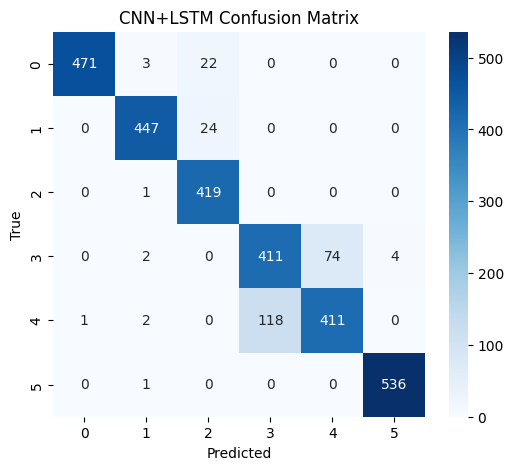

93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step

=== CNN+GRU ===
[[468   0  28   0   0   0]
 [  5 445  21   0   0   0]
 [  4   0 416   0   0   0]
 [  0   4   0 435  52   0]
 [  0   0   0 157 375   0]
 [  0  27   0   0   0 510]]
Accuracy: 0.8988802171700034
              precision    recall  f1-score   support

           0       0.98      0.94      0.96       496
           1       0.93      0.94      0.94       471
           2       0.89      0.99      0.94       420
           3       0.73      0.89      0.80       491
           4       0.88      0.70      0.78       532
           5       1.00      0.95      0.97       537

    accuracy                           0.90      2947
   macro avg       0.90      0.90      0.90      2947
weighted avg       0.91      0.90      0.90      2947



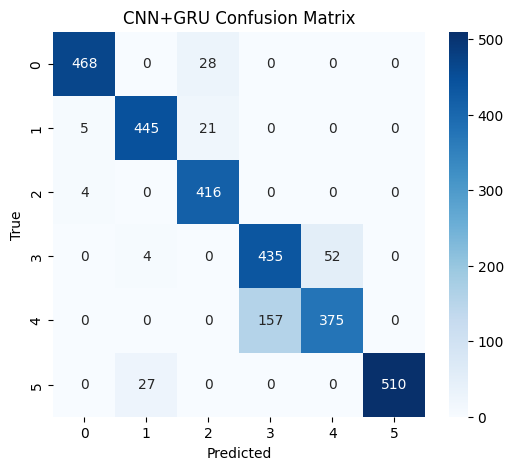

In [8]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def evaluate_model(model, testX, testy, title):
    pred = model.predict(testX)
    pred = np.argmax(pred, axis=-1)
    cm = confusion_matrix(testy, pred)
    acc = accuracy_score(testy, pred)
    print(f"\n=== {title} ===")
    print(cm)
    print("Accuracy:", acc)
    print(classification_report(testy, pred))
    plt.figure(figsize=(6,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'{title} Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

evaluate_model(cnn_lstm, testX, testy, 'CNN+LSTM')
evaluate_model(cnn_gru, testX, testy, 'CNN+GRU')